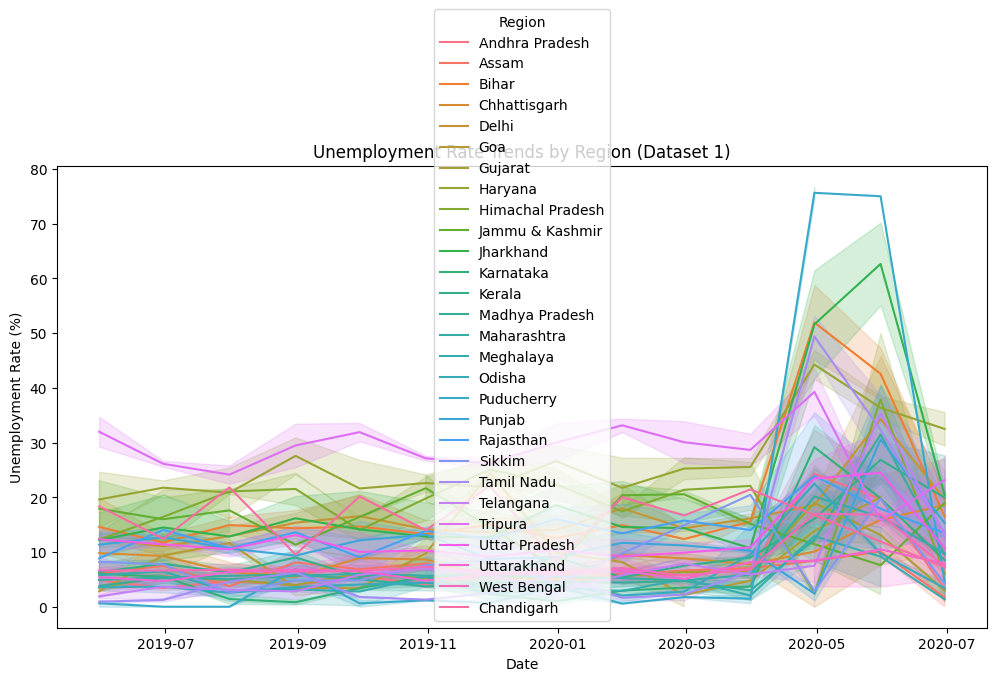

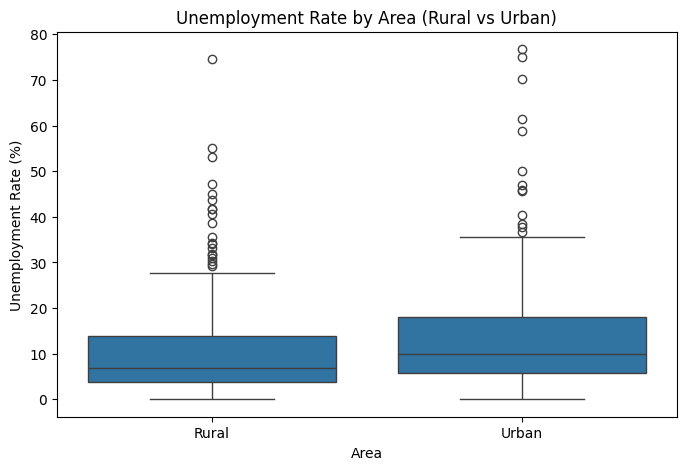

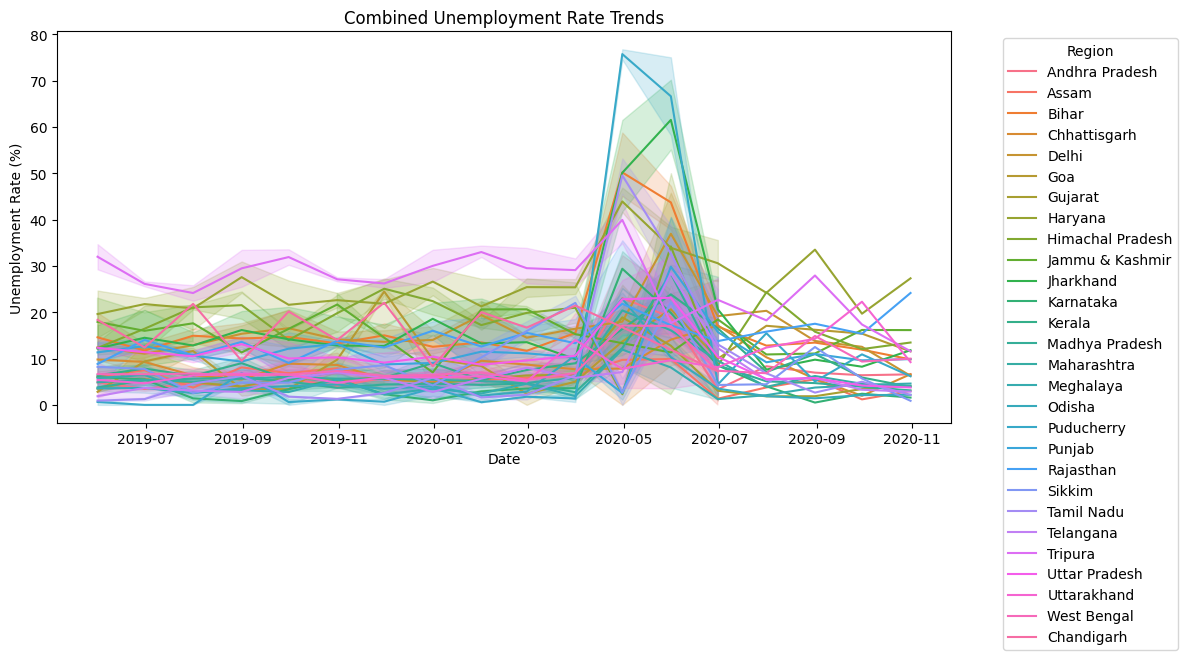

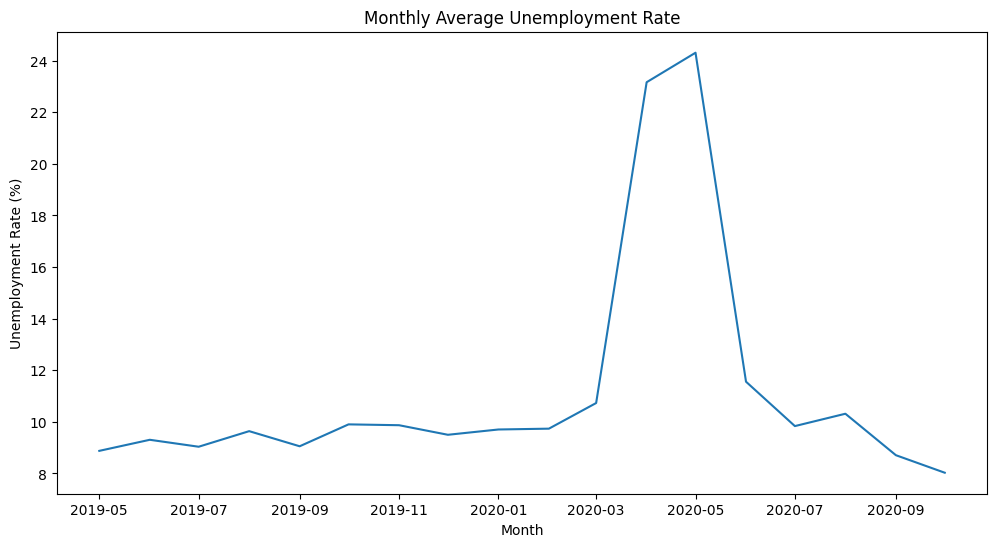

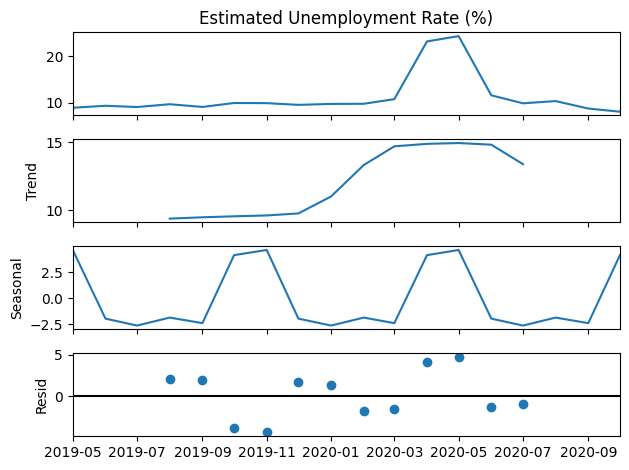

<ipython-input-16-2247696cd615>:100: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=monthly_avg.index[-1], periods=12, freq='M')


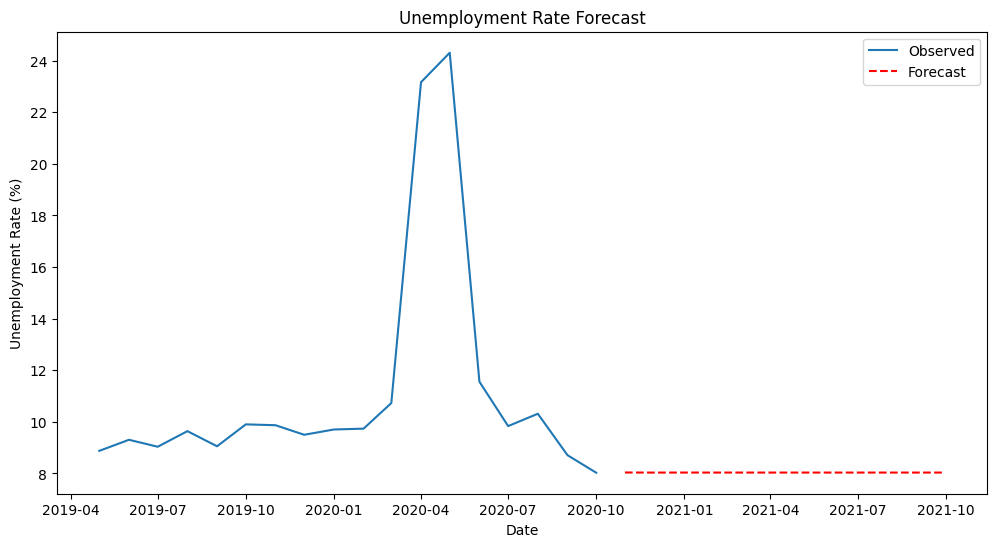

In [16]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

# Load the datasets
file_path1 = 'Unemployment in India.csv'
file_path2 = 'Unemployment_Rate_upto_11_2020.csv'

data1 = pd.read_csv(file_path1)
data2 = pd.read_csv(file_path2)

# Clean column names (remove extra spaces)
data1.columns = data1.columns.str.strip()
data2.columns = data2.columns.str.strip()

# Handle missing values in Dataset 1
data1 = data1.dropna()

# Drop redundant column in Dataset 2
data2 = data2.drop(columns=['Region.1'], axis=1)

# Convert Date column to datetime format
# Strip leading/trailing spaces from the 'Date' column before conversion
data1['Date'] = data1['Date'].str.strip()
data1['Date'] = pd.to_datetime(data1['Date'], format='%d-%m-%Y')

data2['Date'] = data2['Date'].str.strip()
data2['Date'] = pd.to_datetime(data2['Date'], format='%d-%m-%Y')

# EDA: Visualize trends in unemployment
plt.figure(figsize=(12, 6))
sns.lineplot(data=data1, x='Date', y='Estimated Unemployment Rate (%)', hue='Region')
plt.title('Unemployment Rate Trends by Region (Dataset 1)')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend(title='Region')
plt.show()

# Visualize unemployment by Area (Rural/Urban)
plt.figure(figsize=(8, 5))
sns.boxplot(data=data1, x='Area', y='Estimated Unemployment Rate (%)')
plt.title('Unemployment Rate by Area (Rural vs Urban)')
plt.xlabel('Area')
plt.ylabel('Unemployment Rate (%)')
plt.show()

# Merge datasets for combined analysis (if needed)
merged_data = pd.concat([data1, data2], ignore_index=True)

# Ensure 'Date' column is in datetime format after merge
merged_data['Date'] = pd.to_datetime(merged_data['Date'], format='%d-%m-%Y')

# Visualize trends in merged data
plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_data, x='Date', y='Estimated Unemployment Rate (%)', hue='Region')
plt.title('Combined Unemployment Rate Trends')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Feature engineering: Monthly average unemployment
# Select only numeric columns for calculating the mean
numeric_columns = merged_data.select_dtypes(include=['number'])

# Group by month and calculate mean
monthly_avg = numeric_columns.groupby(merged_data['Date'].dt.to_period('M')).mean()
monthly_avg.index = monthly_avg.index.to_timestamp()

# Plot monthly average unemployment
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_avg, x=monthly_avg.index, y='Estimated Unemployment Rate (%)')
plt.title('Monthly Average Unemployment Rate')
plt.xlabel('Month')
plt.ylabel('Unemployment Rate (%)')
plt.show()

# Save cleaned datasets
data1.to_csv('Cleaned_Unemployment_in_India.csv', index=False)
data2.to_csv('Cleaned_Unemployment_Rate_upto_11_2020.csv', index=False)

# Forecasting: Time series analysis (optional)

# Decompose the time series
# Decompose the time series with a smaller period (e.g., period=6 for 18 observations)
result = seasonal_decompose(monthly_avg['Estimated Unemployment Rate (%)'], model='additive', period=6)
result.plot()
plt.show()

# ARIMA modeling
model = ARIMA(monthly_avg['Estimated Unemployment Rate (%)'], order=(1, 1, 1))
model_fit = model.fit()

# Forecast future values
forecast = model_fit.forecast(steps=12)
forecast_index = pd.date_range(start=monthly_avg.index[-1], periods=12, freq='M')

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg.index, monthly_avg['Estimated Unemployment Rate (%)'], label='Observed')
plt.plot(forecast_index, forecast, label='Forecast', linestyle='--', color='red')
plt.title('Unemployment Rate Forecast')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.show()


# New section